In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Column Types

- **Numerical** - Age,Fare,PassengerId
- **Categorical** - Survived, Pclass, Sex, SibSp, Parch,Embarked
- **Mixed** - Name, Ticket, Cabin

### Steps of doing Univariate Analysis on Numerical columns

- **Descriptive Statistics**: Compute basic summary statistics for the column, such as mean, median, mode, standard deviation, range, and quartiles. These statistics give a general understanding of the distribution of the data and can help identify skewness or outliers.

- **Visualizations**: Create visualizations to explore the distribution of the data. Some common visualizations for numerical data include histograms, box plots, and density plots. These visualizations provide a visual representation of the distribution of the data and can help identify skewness an outliers.

- **Identifying Outliers**: Identify and examine any outliers in the data. Outliers can be identified using visualizations. It is important to determine whether the outliers are due to measurement errors, data entry errors, or legitimate differences in the data, and to decide whether to include or exclude them from the analysis.

- **Skewness**: Check for skewness in the data and consider transforming the data or using robust statistical methods that are less sensitive to skewness, if necessary.

- **Conclusion**: Summarize the findings of the EDA and make decisions about how to proceed with further analysis.


In [2]:
# Importing the Dataset Titanic
df = pd.read_csv('train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Performing Univariate Analysis on Numerical Cols:

`Conclusions On Age:`
- (i) The column is almost normally distributed i.e skewness is almost zero.

- (ii) We see median Age is 28 and there are a few outliers too.

- (iii) There are so many missing values in the column which we must fix. Around 20% of data is null.


In [4]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

<Axes: ylabel='Density'>

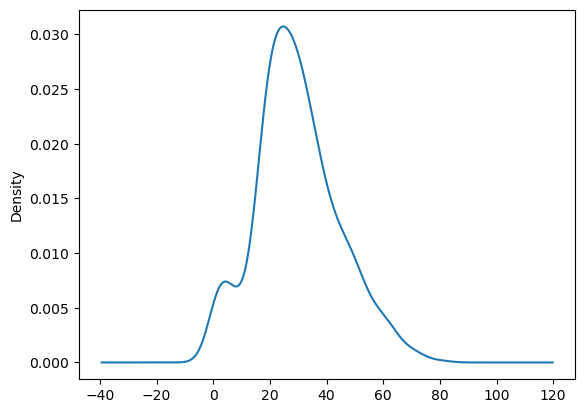

In [12]:
df['Age'].plot(kind='kde')

In [ ]:
# Check the skewness
df['Age'].skew() # Near 0 -> almost normal distribution.

np.float64(0.38910778230082704)

<Axes: ylabel='Frequency'>

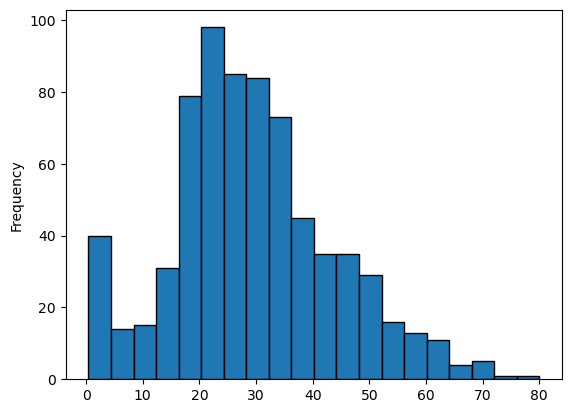

In [15]:
df['Age'].plot(kind='hist',bins=20,edgecolor='k')

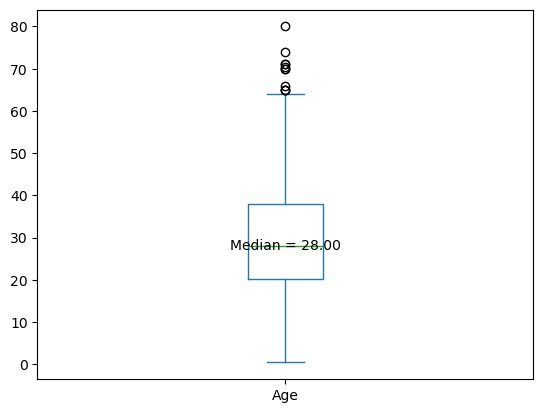

In [ ]:
# Plotting boxplot for median and outliers

ax = df['Age'].plot(kind='box')
median = df['Age'].median()
ax.text(1,median,f'Median = {median:.2f}',
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 10,
        color = 'black')
plt.show()

In [ ]:
# Checking for nulls Percentage
(df['Age'].isna().sum())/len(df['Age'])*100

np.float64(19.865319865319865)

`Conclusions on Fare:`

- (i) The data is highly positive skewed.

- (ii) Fare column actually contains the group fare and not individual fare of the passengers. This might
        be an an issue (we can feature engineer a column named individual fare.)

- (iii) There are no nulls in the column.

In [5]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<Axes: ylabel='Frequency'>

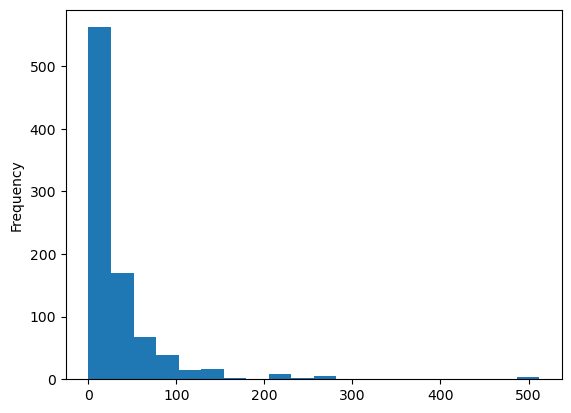

In [6]:
# Distribution plots
df['Fare'].plot(kind='hist',bins=20)

<Axes: ylabel='Density'>

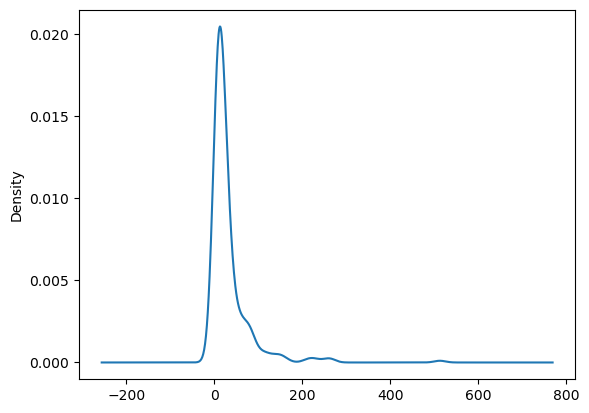

In [7]:
df['Fare'].plot(kind='kde') # Highly skewed Data

In [8]:
df['Fare'].skew() # big positive number -> highly positive skewed

np.float64(4.787316519674893)

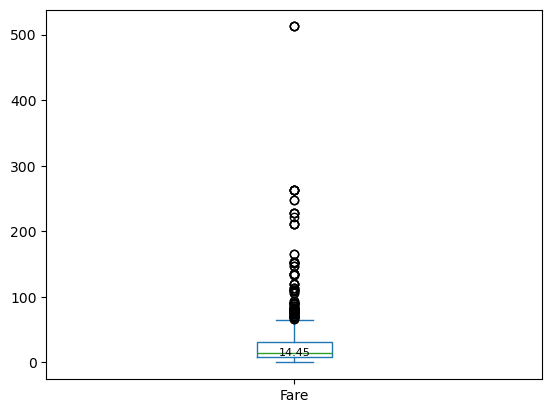

In [9]:
ax = df['Fare'].plot(kind='box') # so many outliers after around 100 to more than 500.
median = df['Fare'].median()

#Annotate median value on the plot
ax.text(1,median,f'{median:.2f}',
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 8,
        color = 'black')
plt.show() 

In [12]:
df[df['Fare']>500]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


In [39]:
df[df['Ticket'] == '19950']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0,C23 C25 C27,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0,C23 C25 C27,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0,C23 C25 C27,S


In [13]:
# Checking for the nulls

df['Fare'].isnull().sum()

np.int64(0)

### Steps of doing Univariate Analysis on Categorical columns

**Descriptive Statistics**: Compute the frequency distribution of the categories in the column. This will give a general understanding of the distribution of the categories and their relative frequencies.

**Visualizations**: Create visualizations to explore the distribution of the categories. Some common visualizations for categorical data include count plots and pie charts. These visualizations provide a visual representation of the distribution of the categories and can help identify any patterns or anomalies in the data.

**Missing Values**: Check for missing values in the data and decide how to handle them. Missing values can be imputed or excluded from the analysis, depending on the research question and the data set.

**Conclusion**: Summarize the findings of the EDA and make decisions about how to proceed with further analysis.

`Conclusions on Survived:`

- (i) The accident was so deadly only 38.38% of the passengers could survive the accident.

- (ii) There are no nulls in the column

<Axes: xlabel='Survived'>

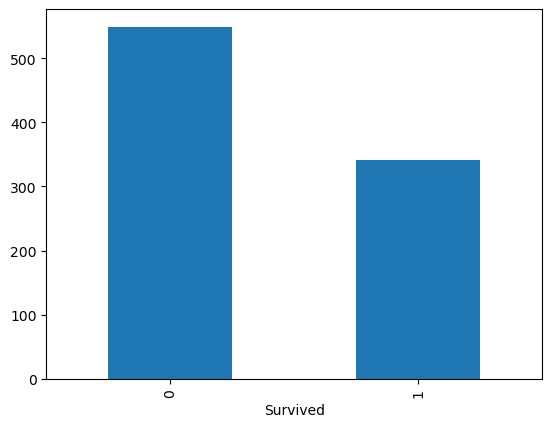

In [17]:
df['Survived'].value_counts().plot(kind='bar') # This gives count 

<Axes: ylabel='count'>

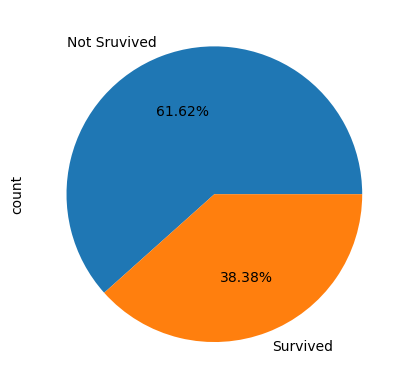

In [23]:
# To find the percentage of the survived

labels = ['Not Sruvived' if i == 0 else 'Survived' for i in df['Survived'].value_counts().index]
df['Survived'].value_counts().plot(kind='pie',labels = labels,autopct='%.2f%%')

# This shows that only 38.38% of the passengers actually survived the incident.

In [24]:
# There are no nulls in the column
df['Survived'].isna().sum()

np.int64(0)

`Conclusions on PClass:`

- (i) Surprisingly less people travelled in Class 2 and more people travelled in Class 1.

- (ii) 

In [25]:
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [26]:
df.groupby('Pclass')['Fare'].mean()

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

<Axes: ylabel='count'>

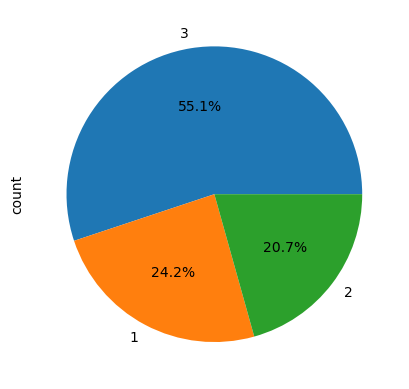

In [27]:
df['Pclass'].value_counts().plot(kind='pie',autopct='%.1f%%')

In [28]:
df['Pclass'].isnull().sum() # No nulls in the data

np.int64(0)

`Conclusions on Sex:`

- The data is fairly distributed. There are no nulls in the data. I don't see any need of further EDA here.

In [29]:
df['Sex'].value_counts() # pretty normal data

Sex
male      577
female    314
Name: count, dtype: int64

<Axes: ylabel='count'>

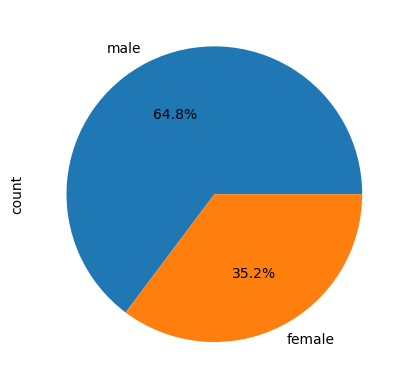

In [31]:
df['Sex'].value_counts().plot(kind='pie',autopct = '%.1f%%')

In [32]:
df['Sex'].isnull().sum()

np.int64(0)

`Conclusions on SibSp: This column tells us the number of passengers travelling with their siblings or husband and wife` 

- (i) If you look then SibSp and Parch are same columns, so we don't need two different columns for same info.

- (ii) The data is evenly distributed, like most of the passengers are travelling solo and the count goes down as the member
        increases.

- (iii) There are no nulls in the column.

- (iv) Since most of the passengers are travelling alone, we can create a new col named is_alone,
        this might help us understand if travelling alone or with family created a diff in survival rates.

In [33]:
df['SibSp'].value_counts() 

# This shows most of the passengers were travelling alone
# The data is distributed normally.

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

<Axes: ylabel='count'>

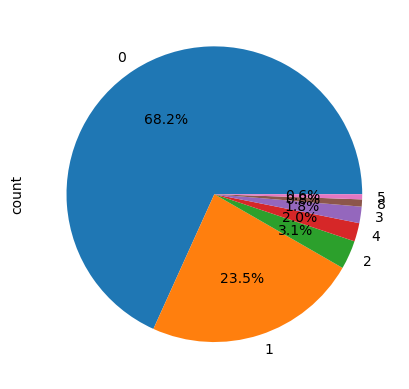

In [35]:
df['SibSp'].value_counts().plot(kind='pie',autopct='%.1f%%')

In [36]:
df['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [37]:
df['SibSp'].isna().sum()

np.int64(0)

`Conclusions on Embarked: This is the column which tells us The travel route of Titanic`

- (i) Most of the passengers boarded the ship from the start itself i.e from SouthHampton. Then the ship stopped at two locations - namely Cherborg and QueensTown.


<Axes: xlabel='Embarked'>

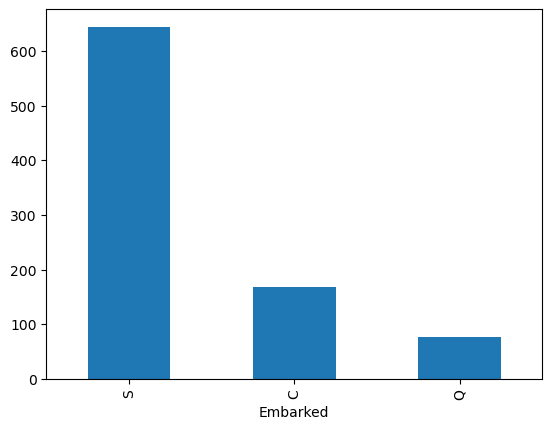

In [39]:
df['Embarked'].value_counts().plot(kind='bar')

### Steps of doing Bivariate Analysis

- Select 2 cols
- Understand type of relationship
    1. **Numerical - Numerical**<br>
        a. You can plot graphs like scatterplot(regression plots), 2D histplot, 2D KDEplots<br>
        b. Check correlation coefficent to check linear relationship
    2. **Numerical - Categorical** - create visualizations that compare the distribution of the numerical data across different categories of the categorical data.<br>
        a. You can plot graphs like barplot, boxplot, kdeplot violinplot even scatterplots<br>
    3. **Categorical - Categorical**<br>
        a. You can create cross-tabulations or contingency tables that show the distribution of values in one categorical column, grouped by the values in the other categorical column.<br>
        b. You can plots like heatmap, stacked barplots, treemaps
        
- Write your conclusions
df

In [52]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [55]:
# Bivariate Analysis on Survived vs Pclass

pivot = df.pivot_table(index='Pclass',columns = 'Survived',values='PassengerId',aggfunc='count')
pivot.columns = ['Not Survived','Survived']
pivot

,Not Survived,Survived
Pclass,,
1,80,136
2,97,87
3,372,119


<Axes: ylabel='Pclass'>

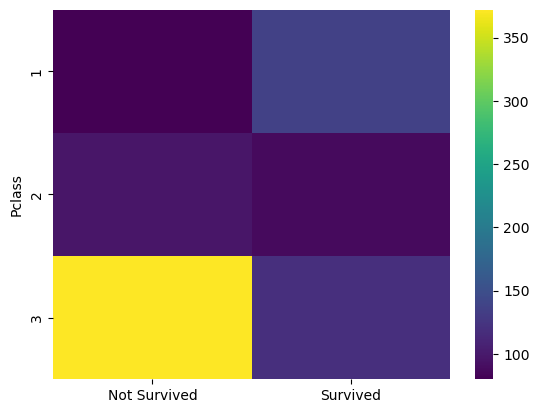

In [57]:
sns.heatmap(pivot,cmap='viridis')

In [66]:
# There is a simpler way to find contingency table

pivot_2 = pd.crosstab(df['Pclass'],df['Survived'])
pivot_2

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [69]:
# We can also show the percentage rather than actual counts using normalize 

pivot_3 = pd.crosstab(df['Survived'],df['Pclass'],normalize='columns')*100
pivot_3 = pivot_3.round(2)

<Axes: xlabel='Pclass', ylabel='Survived'>

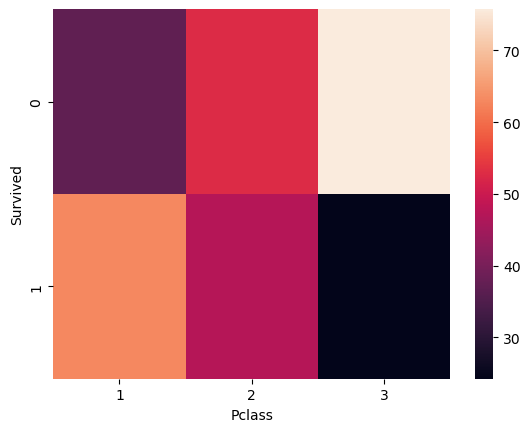

In [70]:
# Creating a heatmap for visualization
sns.heatmap(pivot_3)

`Bivariate Analysis on Survived v/s Sex:`

- `Conclusions:` 81.11 % of males could not survive whereas 74.2% females survived

<Axes: xlabel='Sex', ylabel='Survived'>

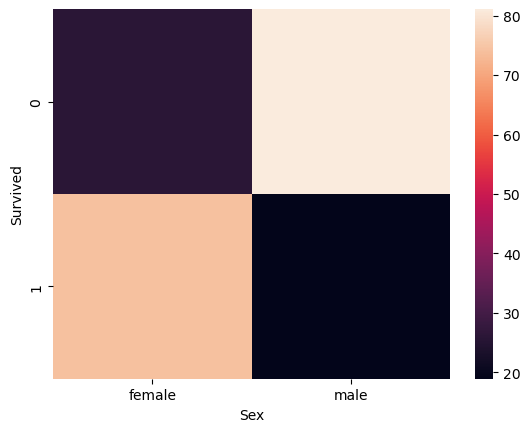

In [79]:
# It is a Categorical v/s Categorical Analysis -> Contingency Table

pivot = pd.crosstab(df['Survived'],df['Sex'],normalize = 'columns')*100
pivot = pivot.round(2)
sns.heatmap(pivot)

In [80]:
pivot

Sex,female,male
Survived,,
0,25.8,81.11
1,74.2,18.89


`Conclusions on Survived v/s Embarked`
- (i) The place of boarding should not influence the survival rates but we can see that it is influencing.
- (ii) There may be possibilty that The people boarded from Cheborg are majority females or that They are from Pclass 1
- (iii) We will have to see that after that we can conclude something

In [83]:
pivot_2 = pd.crosstab(df['Survived'],df['Embarked'],normalize='columns')*100
pivot_2 =pivot_2.round(2)
pivot_2

Embarked,C,Q,S
Survived,,,
0,44.64,61.04,66.3
1,55.36,38.96,33.7


<Axes: xlabel='Embarked', ylabel='Survived'>

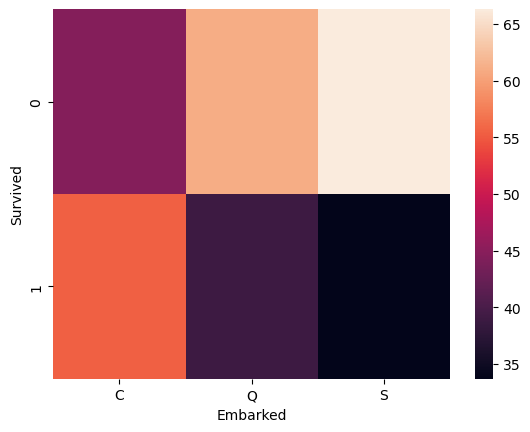

In [84]:
sns.heatmap(pivot_2)

In [ ]:
pd.crosstab(df['Sex'],df['Embarked'],normalize = 'columns')*100

Embarked,C,Q,S
Sex,,,
female,43.452381,46.753247,31.521739
male,56.547619,53.246753,68.478261


In [92]:
pd.crosstab(df['Pclass'],df['Embarked'],normalize = 'columns')*100

Embarked,C,Q,S
Pclass,,,
1,50.595238,2.597403,19.720497
2,10.119048,3.896104,25.465839
3,39.285714,93.506494,54.813665


`Concluding after looking at the tables:`

- (i) 50% of the passengers from Cheborg boarded in Class 1, that's why the survival rate was high

- (ii) There was no clear distinction In the Sex vs Embarked Table

- (iii) This tells that The people travelling from Cheborg were from rich background in comparison to other passengers

### Bivariate Analysis on Numeric Vs Categorical

- Survived vs Age `We will plot kdeplot -> To check how survival differ as age increases`

<Axes: xlabel='Age', ylabel='Density'>

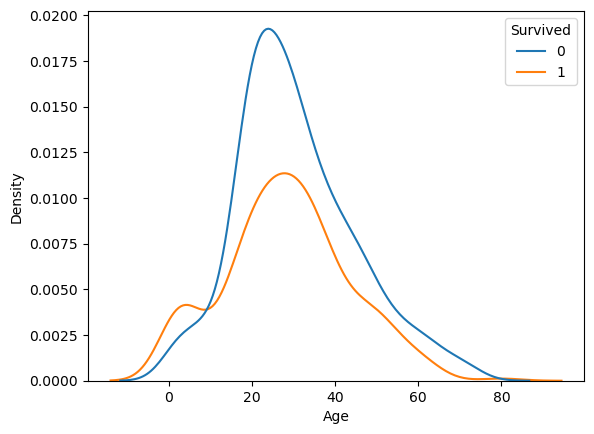

In [ ]:
# Using Seaborn
sns.kdeplot(data= df, x='Age',hue='Survived')

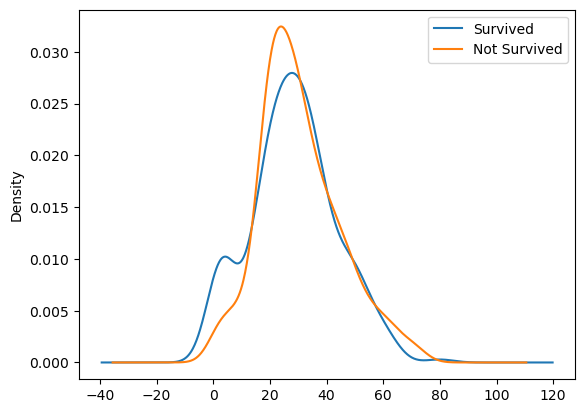

In [100]:
# Using Dataframe plots

df[df['Survived'] == 1]['Age'].plot(kind='kde',label = 'Survived')
df[df['Survived'] == 0]['Age'].plot(kind='kde',label = 'Not Survived')
plt.legend()
plt.show()

In [ ]:
df[df['Pclass'] ==1]['Age'].mean() # See around Age 39 has most passengers in Class1

np.float64(38.233440860215055)

In [ ]:
df[df['Sex'] == 'female']['Age'].mean() # This is not the factor 

np.float64(27.915708812260537)

<Axes: xlabel='Age'>

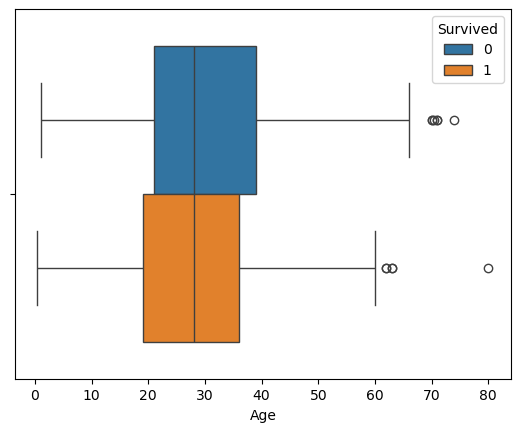

In [106]:
# Creating boxplots between the two Categories 

sns.boxplot(data = df,x = 'Age' , hue = 'Survived')

- `This plot shows that non survived has higher older age people`

- `The median age of survived is a little lower than median age of survived`

- `The non survived has wider age plot that means people died in all age groups`

### Feature Engineeing on Fare, SibSp and Parch

- `The dataset is divided into two datasets i.e train and test that's why Total Tickets Not Equal to Total Family Members`

- `We can combine both the datasets to perform our EDA and feature engineering`

- `Kaggle divided the dataset to perform Predictions but we don't need to predict it here`

In [113]:
df1 = pd.read_csv('test (1).csv')

In [116]:
df = pd.concat([df,df1])

In [117]:
# Individual Fare -> Total fare / (Total Members On board = SibSp + Parch + 1)

df['Individual_fare'] = df['Fare']/(df['SibSp']+df['Parch']+1)

In [120]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Individual_fare
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3.625000
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,35.641650
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,7.925000
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,26.550000
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,8.050000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,8.050000
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,108.900000
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,7.250000
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,8.050000


In [121]:
# Solo travellers have the same fare = individual fare

df[(df['SibSp'] == 0) & (df['Parch'] == 0)][['Fare','Individual_fare']]

,Fare,Individual_fare
2,7.9250,7.9250
4,8.0500,8.0500
5,8.4583,8.4583
6,51.8625,51.8625
11,26.5500,26.5500
...,...,...
412,7.7750,7.7750
413,8.0500,8.0500
414,108.9000,108.9000
415,7.2500,7.2500


In [ ]:
# Now since we concatenated the two data, we get Total family = Total Tickets
df[df['Ticket'] == 'PC 17599']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Individual_fare
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,35.64165
234,1126,NaN,1,"Cumings, Mr. John Bradley",male,39.0,1,0,PC 17599,71.2833,C85,C,35.64165
